(-1, 1)

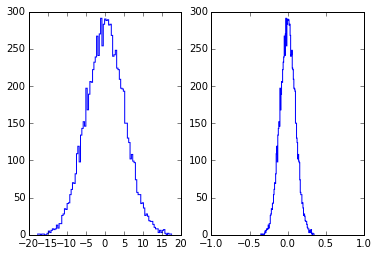

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline     

pi = np.pi
n = 100.
n_ps = 10.
#phase_shift = np.linspace(0, pi/2. - (pi/2)/n_ps, n_ps).reshape(1, n_ps)
t = np.linspace(0, 2*pi-2*pi/n, n).reshape(n)
a = np.cos(t)
b = np.cos(t)

n_iter = 10000

shuffle_product = [np.dot(a, np.random.permutation(b)) for i in range(n_iter)]

plt.subplot(121)
_ = plt.hist(shuffle_product,histtype='step', bins=100)
plt.subplot(122)
_ = plt.hist(shuffle_product/((np.sum(a**2)**0.5)*(np.sum(a**2)**0.5)), histtype='step', bins=100)
plt.xlim(-1,1)